<a href="https://colab.research.google.com/github/Cordova0397/Carlos_Cordova_EC3/blob/master/Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Analizando la Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Proyecto2_DataSet/Mental Health Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [4]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:31,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:50,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:39,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


# Limpieza de Datos

Identificación y manejo de valores faltantes.

In [5]:
print(df.isnull().sum())

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64


In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287162 entries, 3 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                287162 non-null  object
 1   Gender                   287162 non-null  object
 2   Country                  287162 non-null  object
 3   Occupation               287162 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           287162 non-null  object
 6   treatment                287162 non-null  object
 7   Days_Indoors             287162 non-null  object
 8   Growing_Stress           287162 non-null  object
 9   Changes_Habits           287162 non-null  object
 10  Mental_Health_History    287162 non-null  object
 11  Mood_Swings              287162 non-null  object
 12  Coping_Struggles         287162 non-null  object
 13  Work_Interest            287162 non-null  object
 14  Social_Weakness          

Eliminamos las filas con valores nulos para asegurar que todos los registros estén completos y no introduzcan sesgos o errores en el análisis

# Análisis Univariado

## Distribución de Género

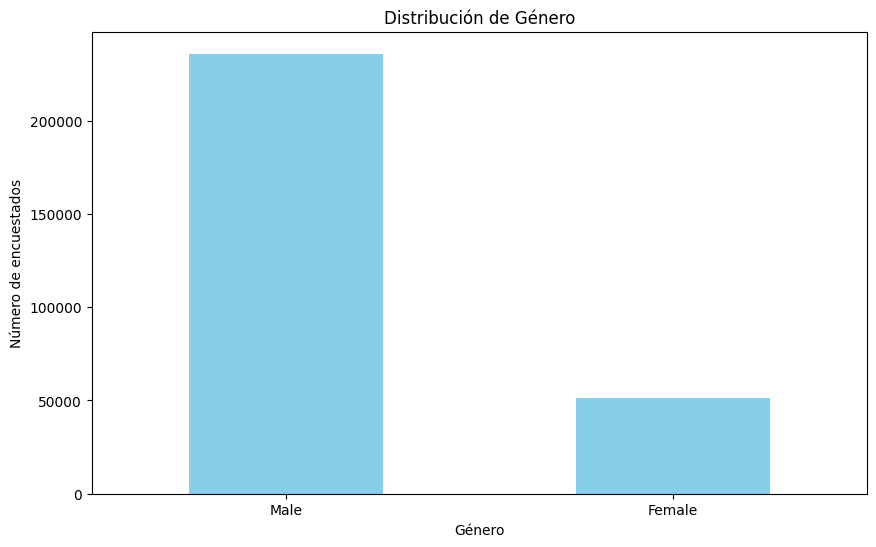

Gender
Male      235950
Female     51212
Name: count, dtype: int64

In [7]:
gender_distribution = df['Gender'].value_counts()

# Graficar la distribución de género
plt.figure(figsize=(10, 6))
gender_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Número de encuestados')
plt.xticks(rotation=0)
plt.show()

# Mostrar los valores de la distribución
gender_distribution


* Distribución de Género
** Masculino: 239,850 encuestados
** Femenino: 52,212 encuestados

#  Distribución de encuestados por país

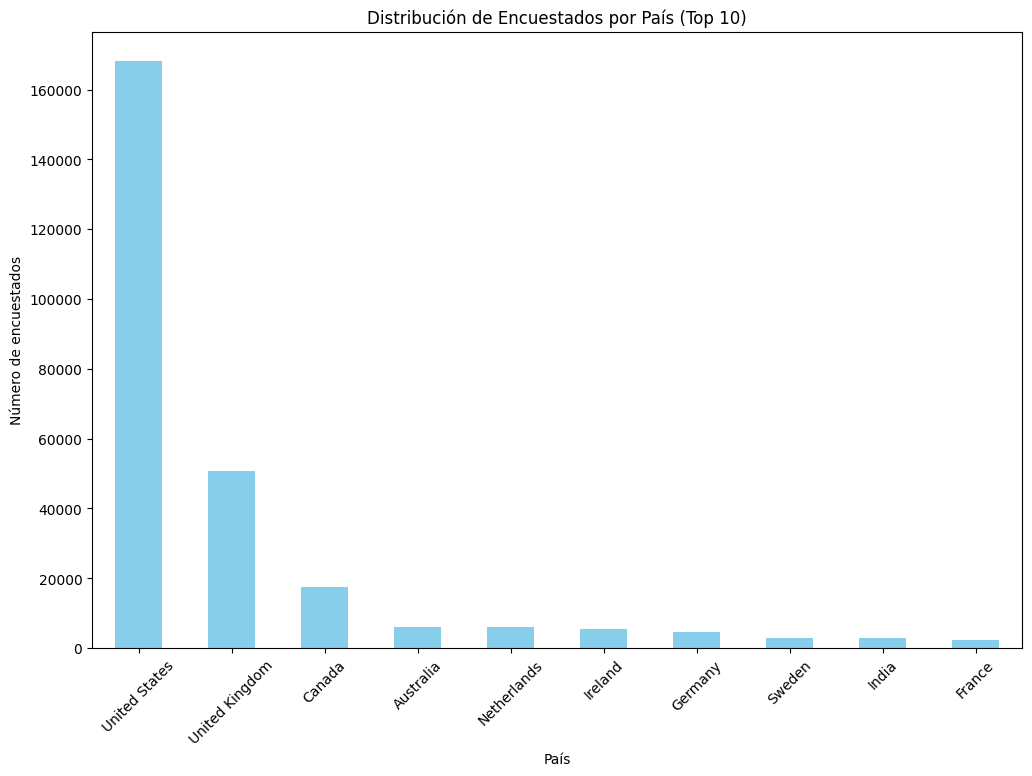

Country
United States     168056
United Kingdom     50624
Canada             17556
Australia           6026
Netherlands         5894
Ireland             5548
Germany             4680
Sweden              2818
India               2774
France              2340
Name: count, dtype: int64

In [8]:
country_distribution = df['Country'].value_counts().head(10)  # Mostramos los 10 principales países

# Graficar la distribución por país
plt.figure(figsize=(12, 8))
country_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribución de Encuestados por País (Top 10)')
plt.xlabel('País')
plt.ylabel('Número de encuestados')
plt.xticks(rotation=45)
plt.show()

# Mostrar los valores de la distribución
country_distribution

## Distribución de las ocupaciones de los encuestados

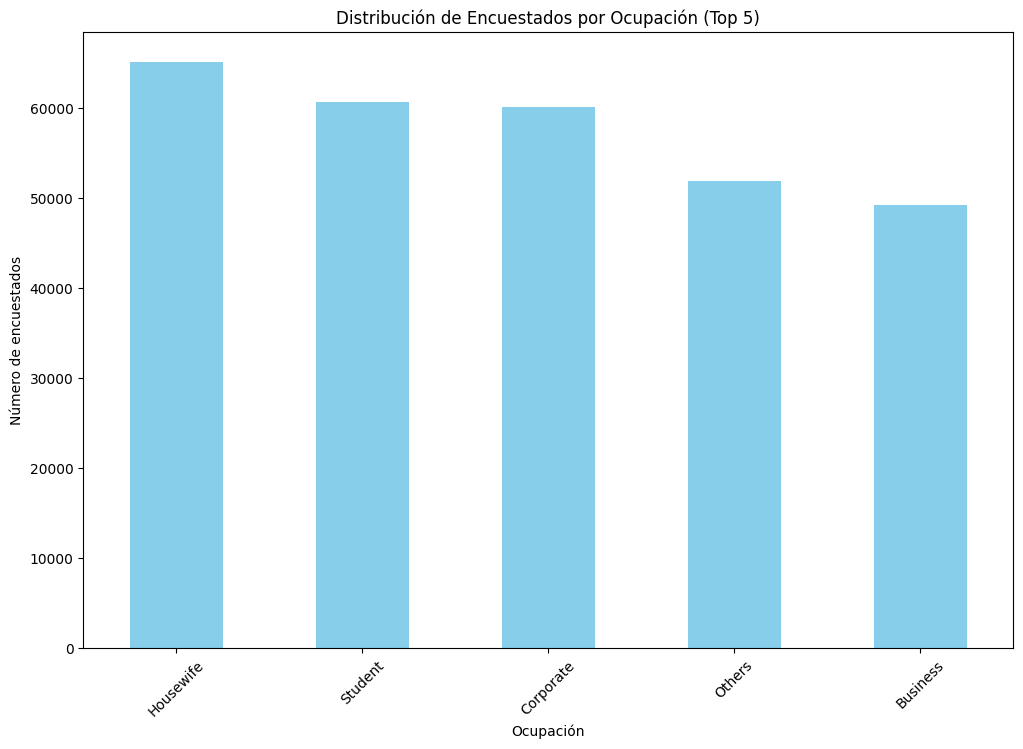

Occupation
Housewife    65173
Student      60687
Corporate    60157
Others       51893
Business     49252
Name: count, dtype: int64

In [9]:
# Distribución por ocupación
occupation_distribution = df['Occupation'].value_counts().head(5)  # Mostramos las 10 principales ocupaciones

# Graficar la distribución por ocupación
plt.figure(figsize=(12, 8))
occupation_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribución de Encuestados por Ocupación (Top 5)')
plt.xlabel('Ocupación')
plt.ylabel('Número de encuestados')
plt.xticks(rotation=45)
plt.show()

# Mostrar los valores de la distribución
occupation_distribution

## Historia Familiar de Salud Mental

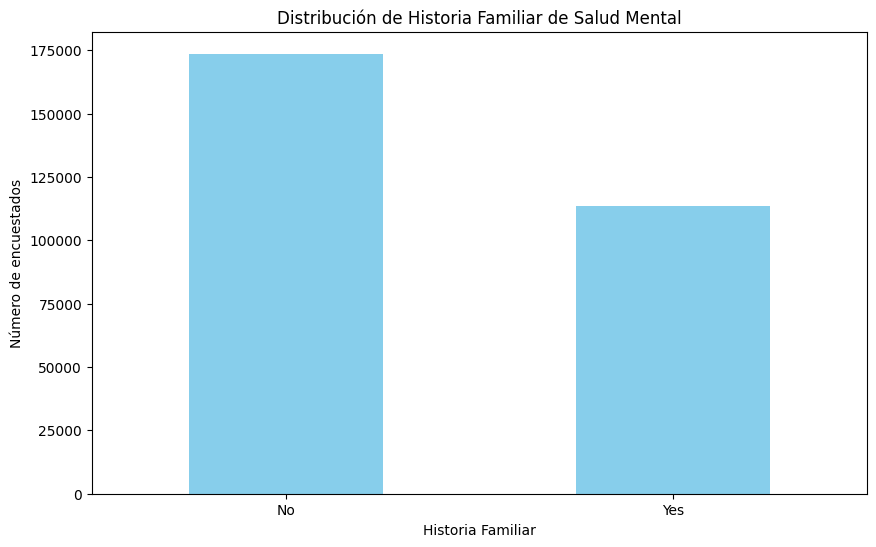

family_history
No     173668
Yes    113494
Name: count, dtype: int64

In [10]:
# Distribución de la historia familiar de salud mental
family_history_distribution = df['family_history'].value_counts()

# Graficar la distribución de la historia familiar de salud mental
plt.figure(figsize=(10, 6))
family_history_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribución de Historia Familiar de Salud Mental')
plt.xlabel('Historia Familiar')
plt.ylabel('Número de encuestados')
plt.xticks(rotation=0)
plt.show()

# Mostrar los valores de la distribución
family_history_distribution


In [11]:
def identificar_outliers(df, columnas):
    outliers = {}
    for column in columnas:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    return outliers

## Tratamiento Recibido

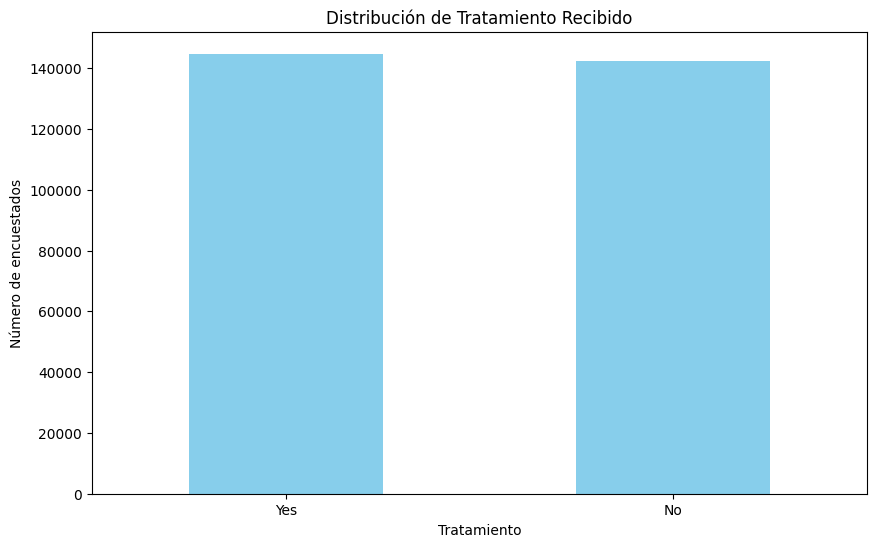

treatment
Yes    144744
No     142418
Name: count, dtype: int64

In [12]:
# Distribución de tratamiento recibido
treatment_distribution = df['treatment'].value_counts()

# Graficar la distribución de tratamiento recibido
plt.figure(figsize=(10, 6))
treatment_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribución de Tratamiento Recibido')
plt.xlabel('Tratamiento')
plt.ylabel('Número de encuestados')
plt.xticks(rotation=0)
plt.show()

# Mostrar los valores de la distribución
treatment_distribution


# Análisis Bivariado

## Género y Tratamiento Recibido

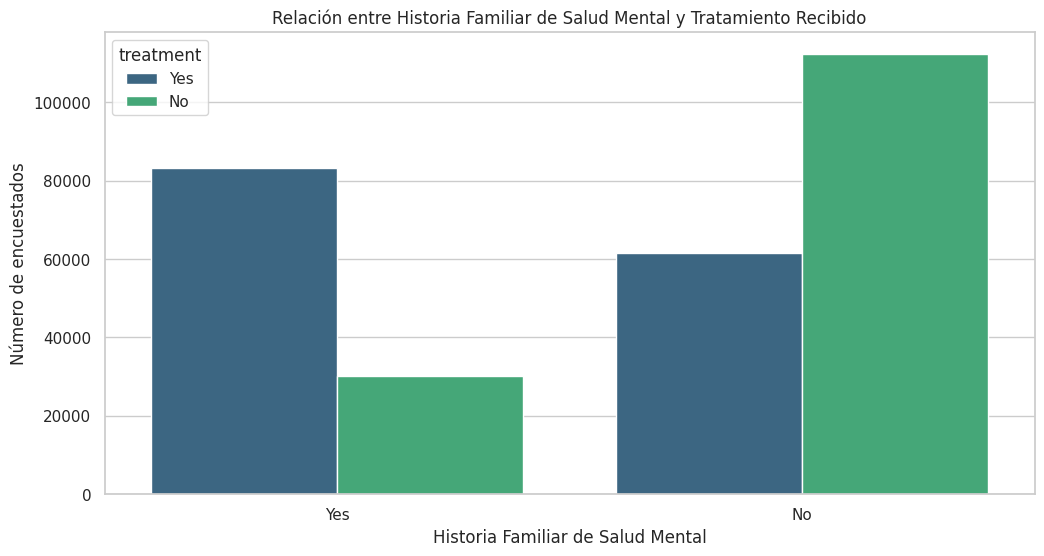

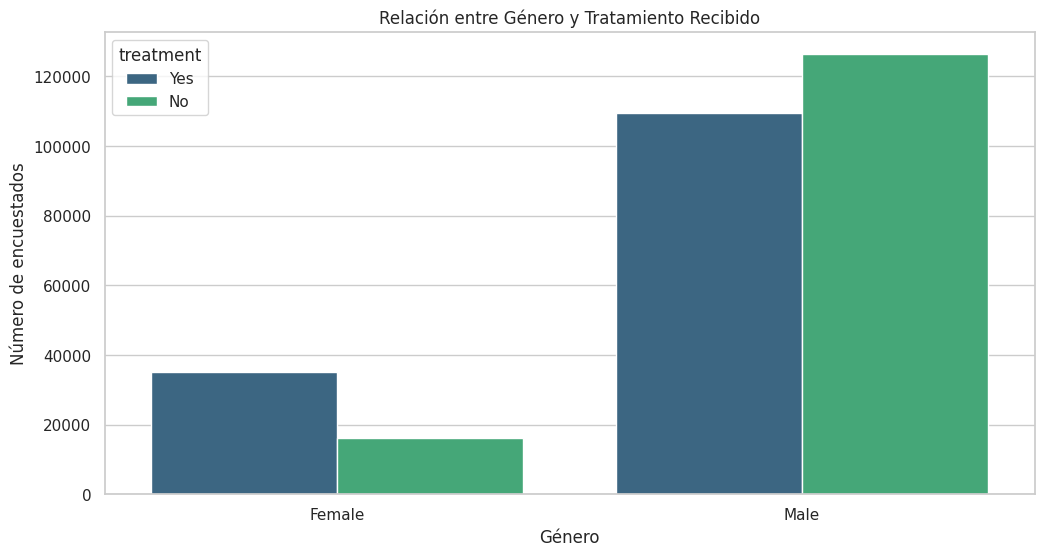

In [13]:
import seaborn as sns

# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Historia Familiar de Salud Mental y Tratamiento Recibido
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='family_history', hue='treatment', palette='viridis')
plt.title('Relación entre Historia Familiar de Salud Mental y Tratamiento Recibido')
plt.xlabel('Historia Familiar de Salud Mental')
plt.ylabel('Número de encuestados')
plt.show()

# Género y Tratamiento Recibido
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Gender', hue='treatment', palette='viridis')
plt.title('Relación entre Género y Tratamiento Recibido')
plt.xlabel('Género')
plt.ylabel('Número de encuestados')
plt.show()


* Relación entre Historia Familiar de Salud Mental y Tratamiento Recibido
**  Las personas con una historia familiar de salud mental tienen una mayor probabilidad de haber recibido tratamiento.
** Tanto los que tienen historia familiar como los que no, muestran una distribución considerable en ambos casos (recibieron tratamiento y no recibieron tratamiento).

* Relación entre Género y Tratamiento Recibido
** Hay una distribución similar entre géneros en términos de recibir tratamiento.
** Tanto hombres como mujeres tienen una probabilidad comparable de haber recibido tratamiento.

# Análisis Multivariado

## Género, Historia Familiar de Salud Mental y Tratamiento Recibido

<Figure size 1400x800 with 0 Axes>

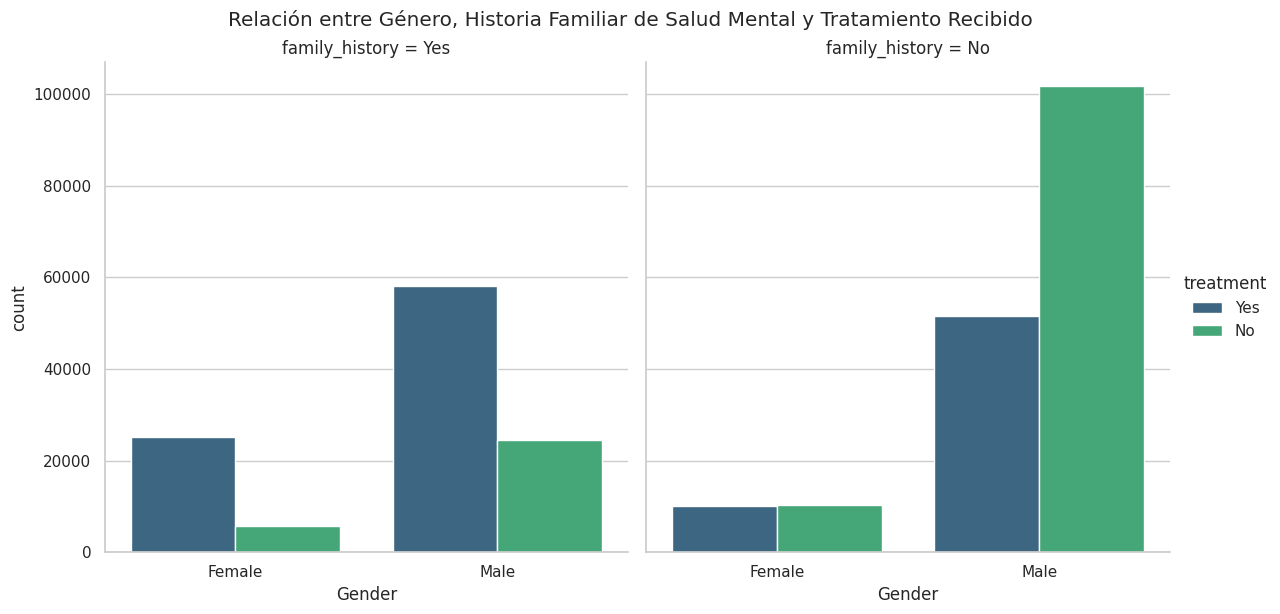

In [14]:
# Relación entre Género, Historia Familiar de Salud Mental y Tratamiento Recibido
plt.figure(figsize=(14, 8))
sns.catplot(data=df, x='Gender', hue='treatment', col='family_history', kind='count', palette='viridis', height=6, aspect=1)
plt.suptitle('Relación entre Género, Historia Familiar de Salud Mental y Tratamiento Recibido', y=1.02)
plt.show()


* Relación entre Género, Historia Familiar de Salud Mental y Tratamiento Recibido
** Las personas con historia familiar de salud mental (tanto hombres como mujeres) muestran una mayor probabilidad de recibir tratamiento en comparación con aquellos sin historia familiar.
** En ambos casos (con y sin historia familiar), la distribución entre géneros en términos de recibir tratamiento es bastante similar.

## Ocupación, Historia Familiar de Salud Mental y Tratamiento Recibido

<Figure size 1400x800 with 0 Axes>

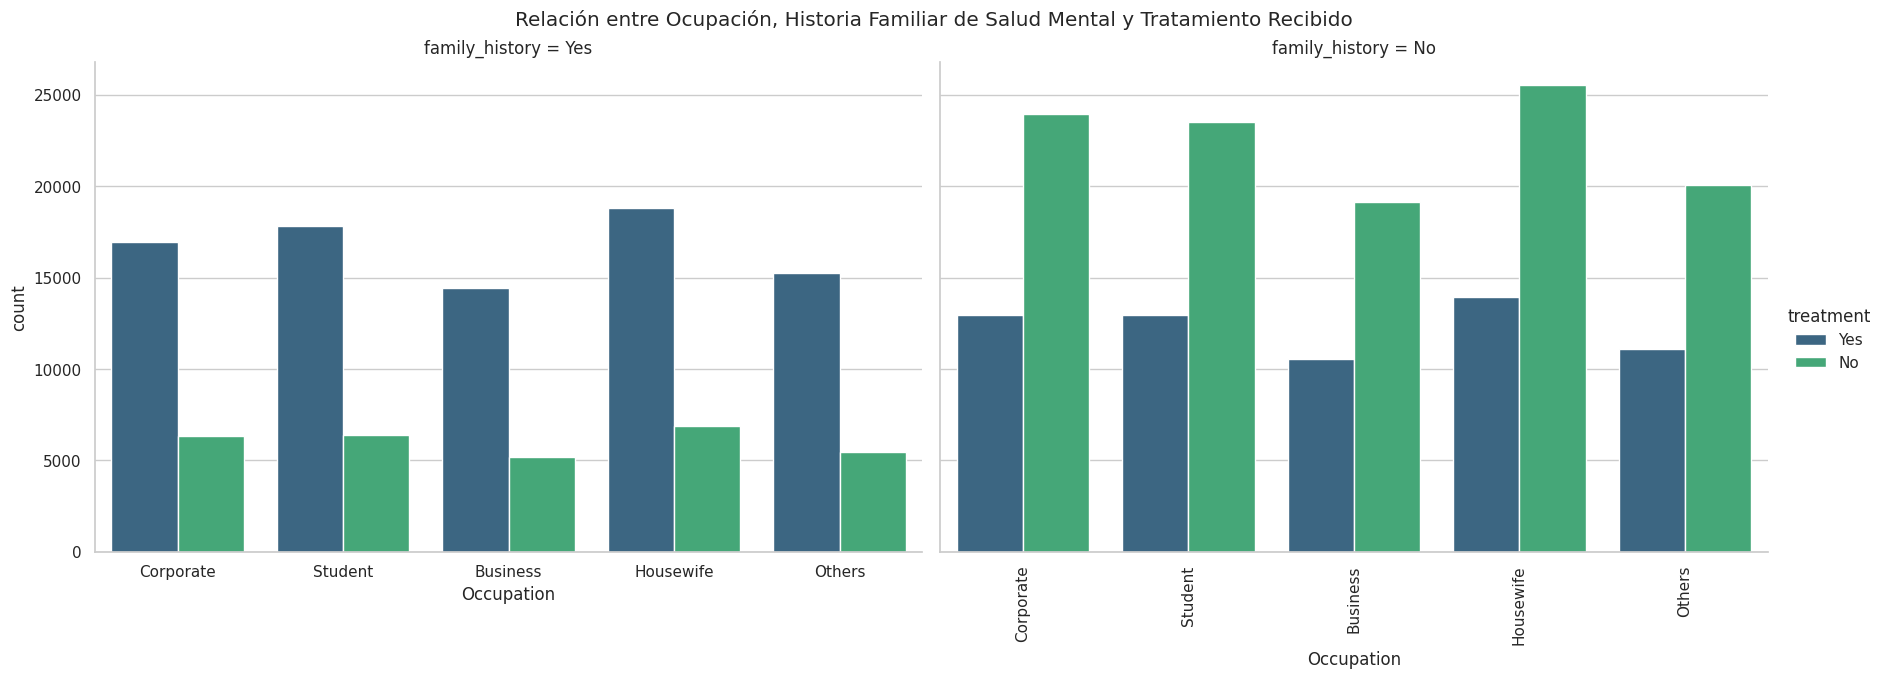

In [15]:
# Relación entre Ocupación, Historia Familiar de Salud Mental y Tratamiento Recibido
plt.figure(figsize=(14, 8))
sns.catplot(data=df, x='Occupation', hue='treatment', col='family_history', kind='count', palette='viridis', height=6, aspect=1.5)
plt.xticks(rotation=90)
plt.suptitle('Relación entre Ocupación, Historia Familiar de Salud Mental y Tratamiento Recibido', y=1.02)
plt.show()


* Relación entre Ocupación, Historia Familiar de Salud Mental y Tratamiento Recibido
** La probabilidad de recibir tratamiento varía según la ocupación.
** En general, las personas con historia familiar de salud mental tienen una mayor probabilidad de recibir tratamiento en todas las ocupaciones.
** La categoría "Estudiante" muestra una alta proporción de encuestados sin tratamiento, independientemente de la historia familiar.
Las ocupaciones "Corporate" y "Business" muestran una mayor probabilidad de recibir tratamiento en comparación con "Housewife" y "Others".

## Resumen
* Historia Familiar de Salud Mental y Tratamiento Recibido: La historia familiar de salud mental aumenta la probabilidad de recibir tratamiento.
* Género y Tratamiento Recibido: No hay diferencias significativas entre géneros en términos de recibir tratamiento.
* Ocupación y Tratamiento Recibido: La probabilidad de recibir tratamiento varía según la ocupación, con "Corporate" y "Business" mostrando mayores probabilidades.

# Modelado

Convertir variables categóricas a numéricas usando LabelEncoder

In [16]:
label_encoders = {}
for column in ['Gender', 'Country', 'Occupation', 'self_employed', 'Days_Indoors', 'Growing_Stress',
               'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest',
               'Social_Weakness', 'mental_health_interview', 'care_options']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [17]:
le_family_history = LabelEncoder()
df['family_history'] = le_family_history.fit_transform(df['family_history'])

In [18]:
le_treatment = LabelEncoder()
df['treatment'] = le_treatment.fit_transform(df['treatment'])

Definir las características (X) y la variable objetivo (y)

In [19]:
X = df.drop(columns=['treatment', 'Timestamp'])
y = df['treatment']

Dividir los datos en conjuntos de entrenamiento y prueba

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Escalado de caracteristicas

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Construccion del modelo

In [22]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Compilacion del modelo

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Entranamiento del modelo

In [24]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
5026/5026 [==============================] - 19s 4ms/step - loss: 0.5651 - accuracy: 0.7145 - val_loss: 0.5476 - val_accuracy: 0.7269
Epoch 2/20
5026/5026 [==============================] - 12s 2ms/step - loss: 0.5294 - accuracy: 0.7360 - val_loss: 0.5161 - val_accuracy: 0.7452
Epoch 3/20
5026/5026 [==============================] - 12s 2ms/step - loss: 0.5079 - accuracy: 0.7468 - val_loss: 0.5039 - val_accuracy: 0.7457
Epoch 4/20
5026/5026 [==============================] - 12s 2ms/step - loss: 0.4951 - accuracy: 0.7508 - val_loss: 0.4964 - val_accuracy: 0.7474
Epoch 5/20
5026/5026 [==============================] - 12s 2ms/step - loss: 0.4853 - accuracy: 0.7553 - val_loss: 0.4815 - val_accuracy: 0.7561
Epoch 6/20
5026/5026 [==============================] - 13s 3ms/step - loss: 0.4785 - accuracy: 0.7585 - val_loss: 0.4783 - val_accuracy: 0.7574
Epoch 7/20
5026/5026 [==============================] - 13s 3ms/step - loss: 0.4735 - accuracy: 0.7604 - val_loss: 0.4706 - val_ac

Prediccion y evaluacion

In [25]:
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

2693/2693 [==============================] - 5s 2ms/step


Metricas de rendimiento

In [26]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [27]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7740658626333445
Precision: 0.7523966036702273
Recall: 0.8223982681988807
F1 Score: 0.7858416037673569


Curva ROC

In [28]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

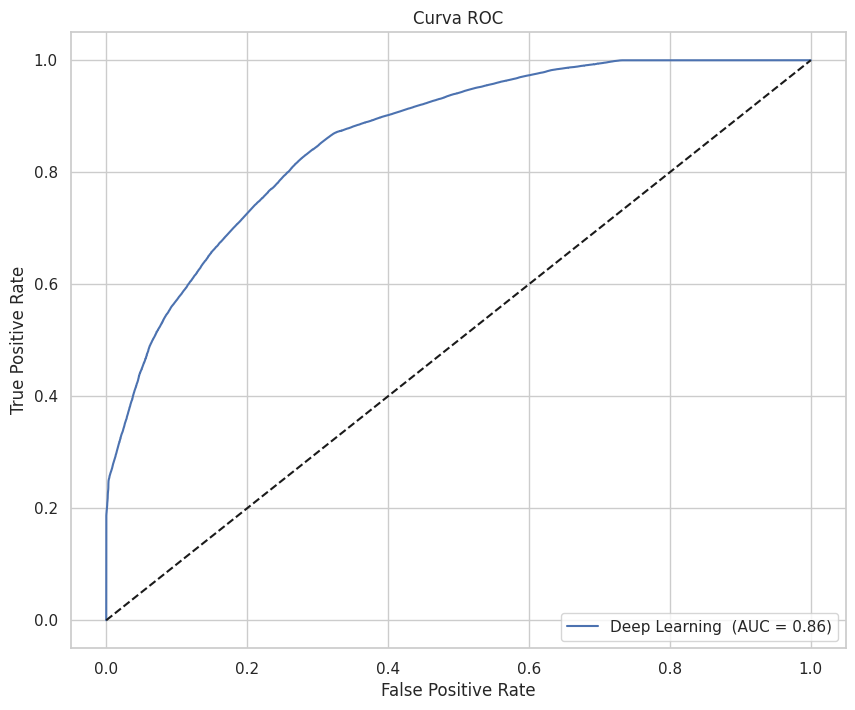

In [29]:
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'Deep Learning  (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()